In [1]:
library("forecast")
library("ggplot2")
library("readxl")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
salesdata <- read_excel("Sales_data_for_US.xlsx")

In [3]:
#Initial data analysis
head(salesdata)

DATE,SALES ($millions),Sales ($billions),SA,Seasonal factors
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2001-01-01,226791,226.791,252.736,89.73435
2001-02-01,223971,223.971,252.730,88.62066
2001-03-01,253439,253.439,250.346,101.23549
2001-04-01,249062,249.062,254.759,97.76377
2001-05-01,268658,268.658,255.262,105.24794
2001-06-01,260315,260.315,254.020,102.47815


In [4]:
#Time series
salesdatats <- ts(salesdata[,3], start= c(2001,1),frequency =12)

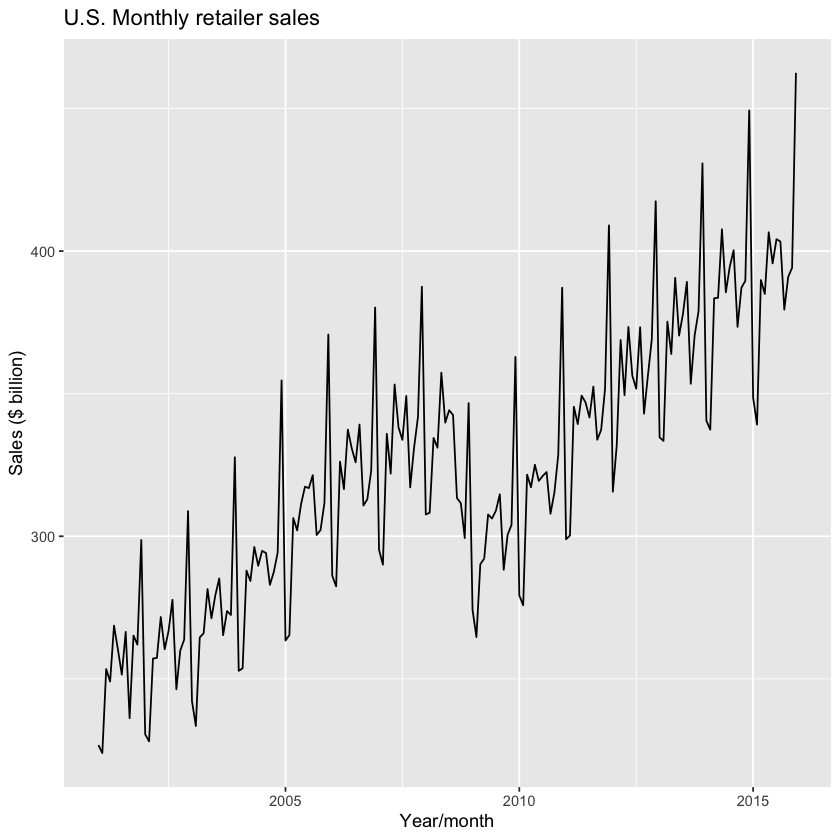

In [5]:
#Autoplot
autoplot(salesdatats) + ylab("Sales ($ billion)") + xlab("Year/month") +
  ggtitle("U.S. Monthly retailer sales")

[1] 12

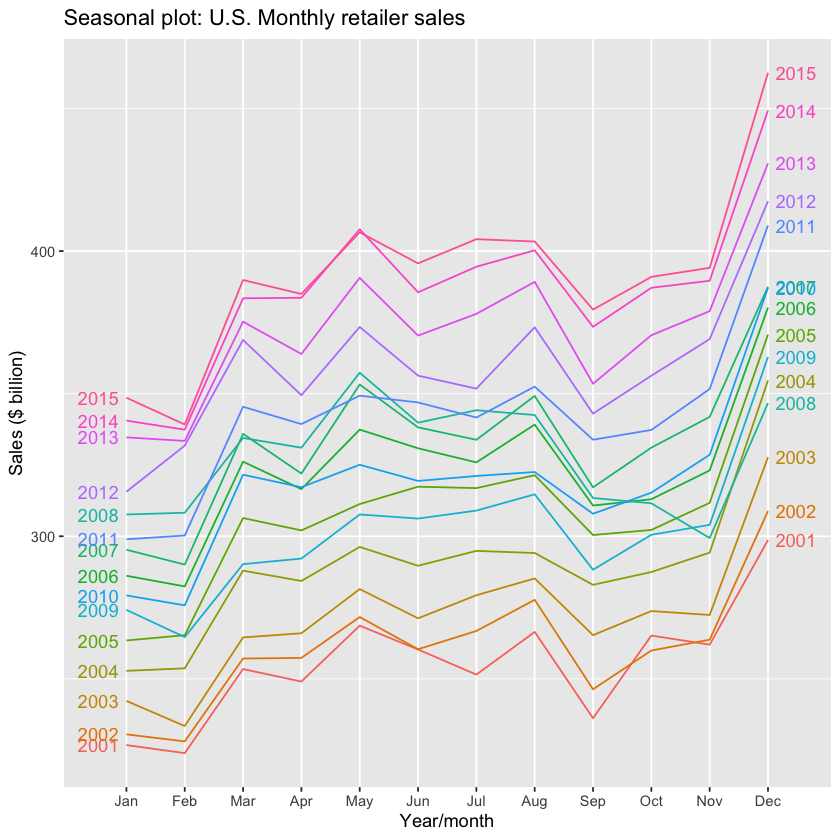

In [6]:
#Seasonal plot
frequency(salesdatats)
ggseasonplot(salesdatats, year.labels=TRUE, year.labels.left=TRUE) + ylab("Sales ($ billion)") + xlab("Year/month") +
  ggtitle("Seasonal plot: U.S. Monthly retailer sales")

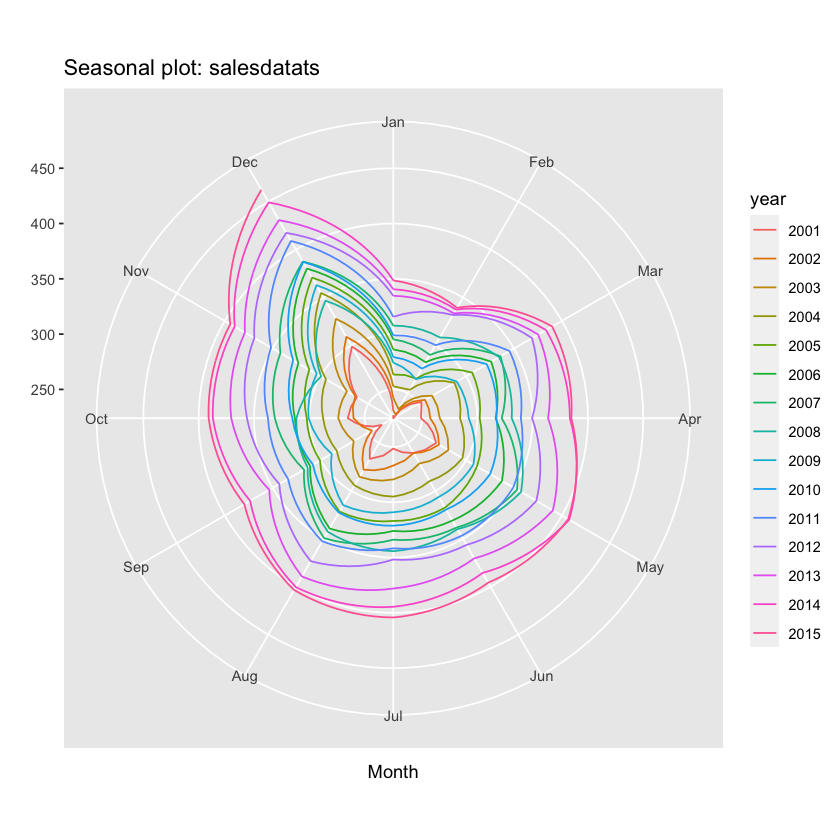

In [7]:
#Seasonal plot with polar coordinates
ggseasonplot(salesdatats, polar = TRUE)

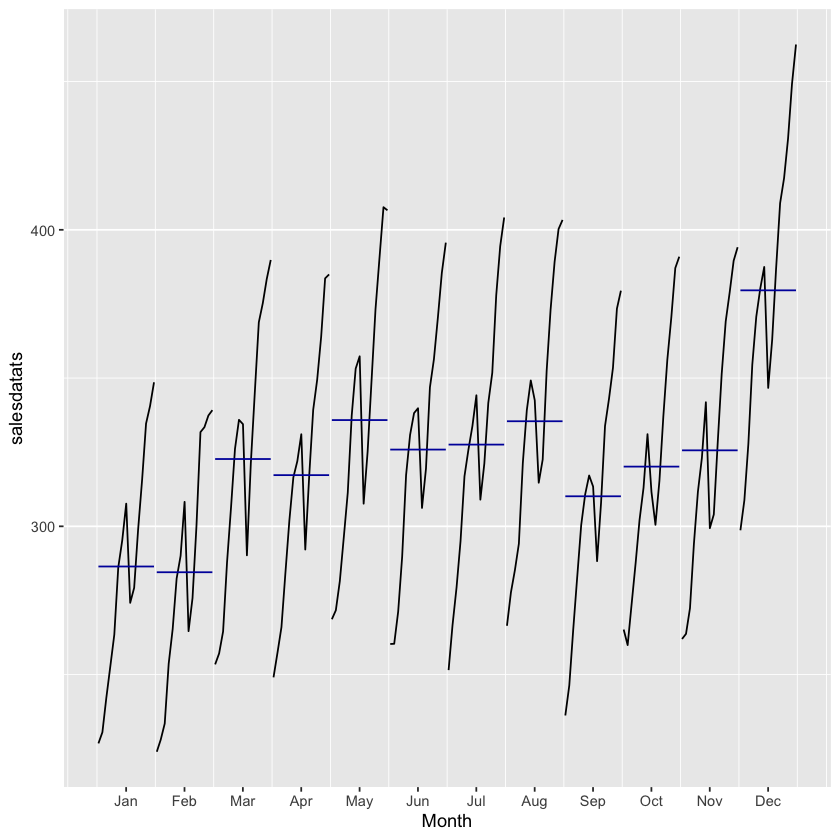

In [8]:
#Seasonal subseries plots show data for each season as a separate time series
ggsubseriesplot(salesdatats)

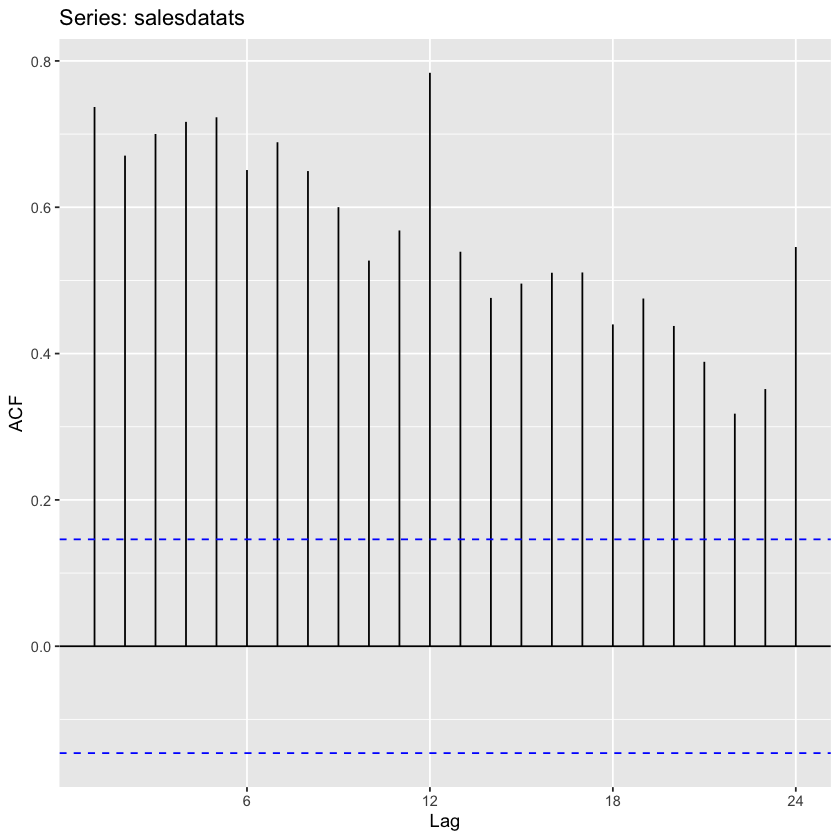

In [9]:
#Autocorrelation plot (correlogram)
ggAcf(salesdatats)

In [10]:
#Forecasting methods
#Benchmark methods
#Naive method
fcsalesnaive <- naive(salesdatats, h=1)

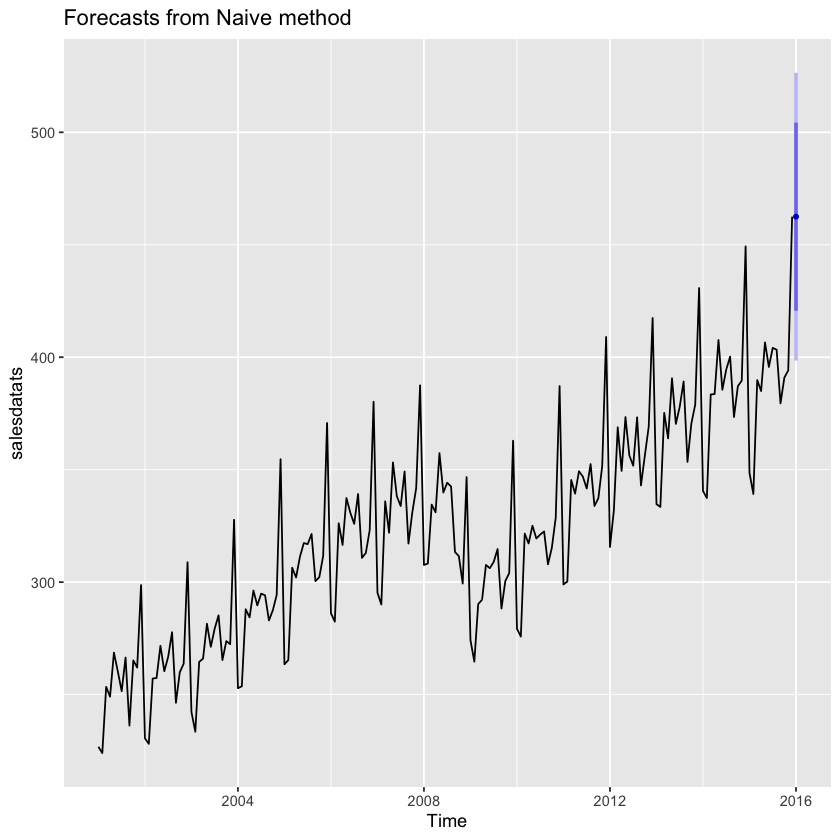

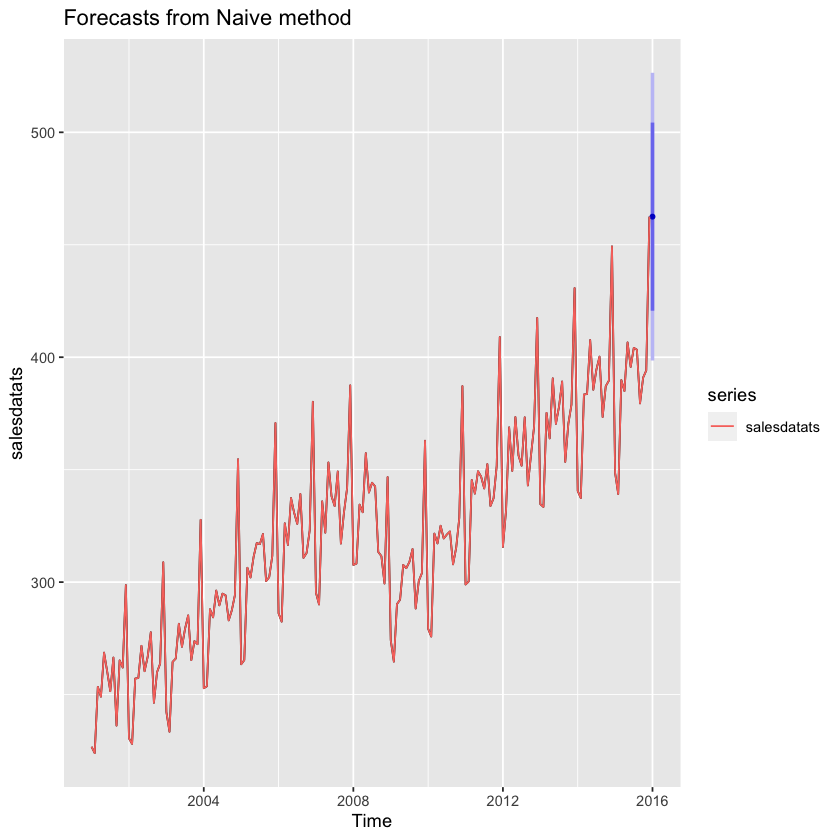

In [11]:
#Autoplots
autoplot(fcsalesnaive)
autoplot(fcsalesnaive) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Naive method
Q* = 466.34, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



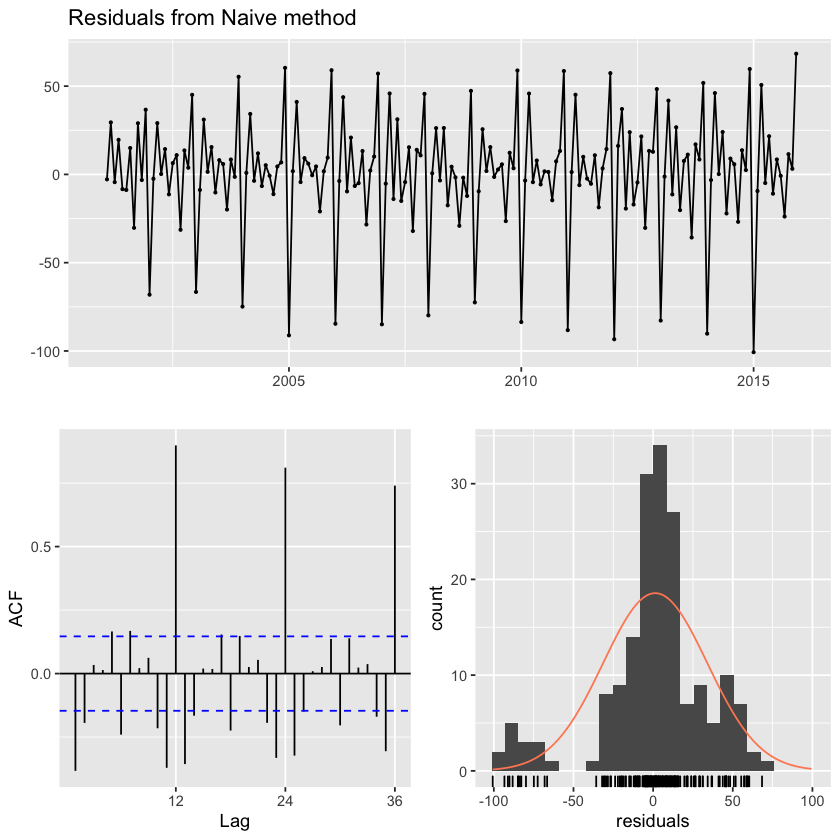

In [12]:
#Check residuals
checkresiduals(fcsalesnaive)

In [13]:
#Summary (with point forecast)
summary(fcsalesnaive)


Forecast method: Naive method

Model Information:
Call: naive(y = salesdatats, h = 1) 

Residual sd: 32.6353 

Error measures:
                   ME    RMSE      MAE       MPE     MAPE     MASE       ACF1
Training set 1.316793 32.6353 22.34173 -0.104949 6.968582 1.463732 -0.3830132

Forecasts:
         Point Forecast    Lo 80    Hi 80   Lo 95   Hi 95
Jan 2016        462.497 420.6732 504.3208 398.533 526.461


In [14]:
#Holt-Winters Method (estimation sample 2001-2012):
#Multiplicative
salestrain <- window(salesdatats, start = c(2001,1), end = c(2012,12))
fchw <- hw(salestrain, seasonal = "multiplicative", initial="simple", h = 1)

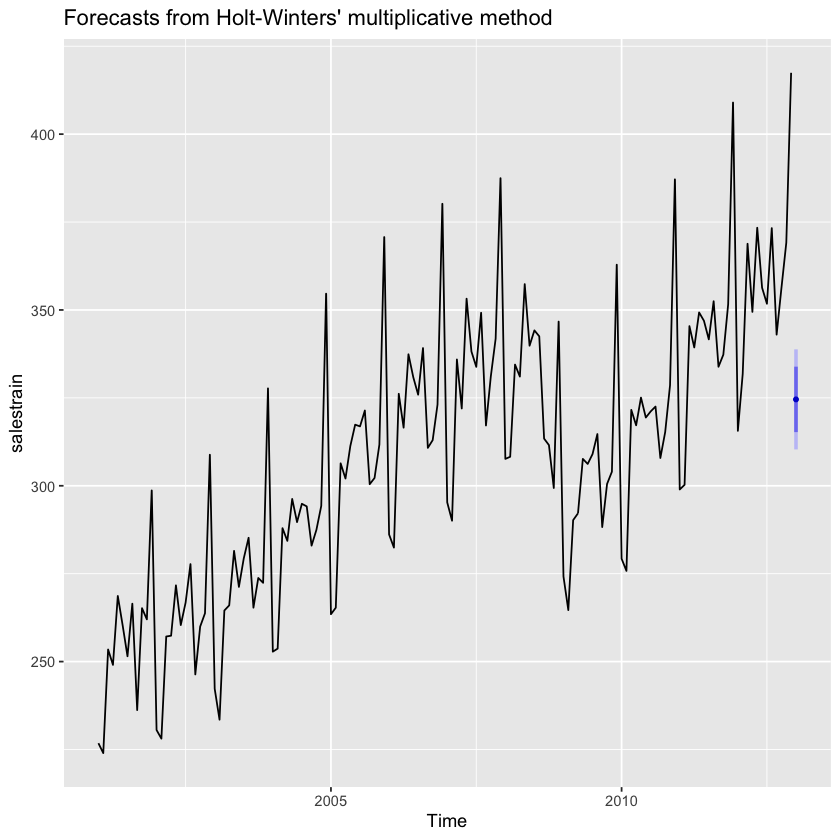

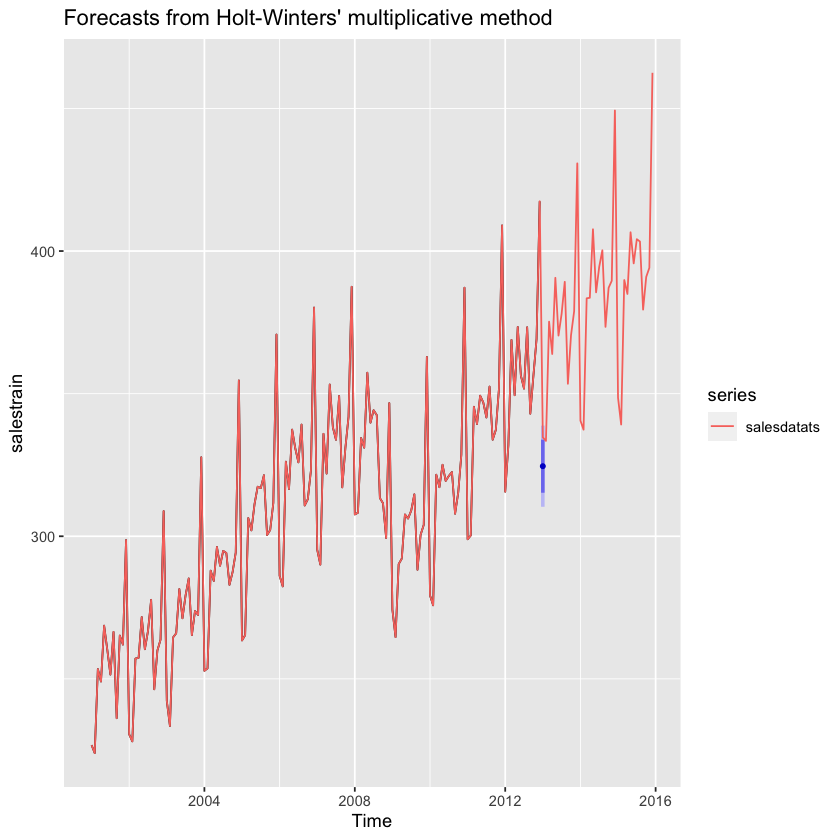

In [15]:
#Autoplots
autoplot(fchw)
autoplot(fchw) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 66.44, df = 7, p-value = 7.719e-12

Model df: 17.   Total lags used: 24



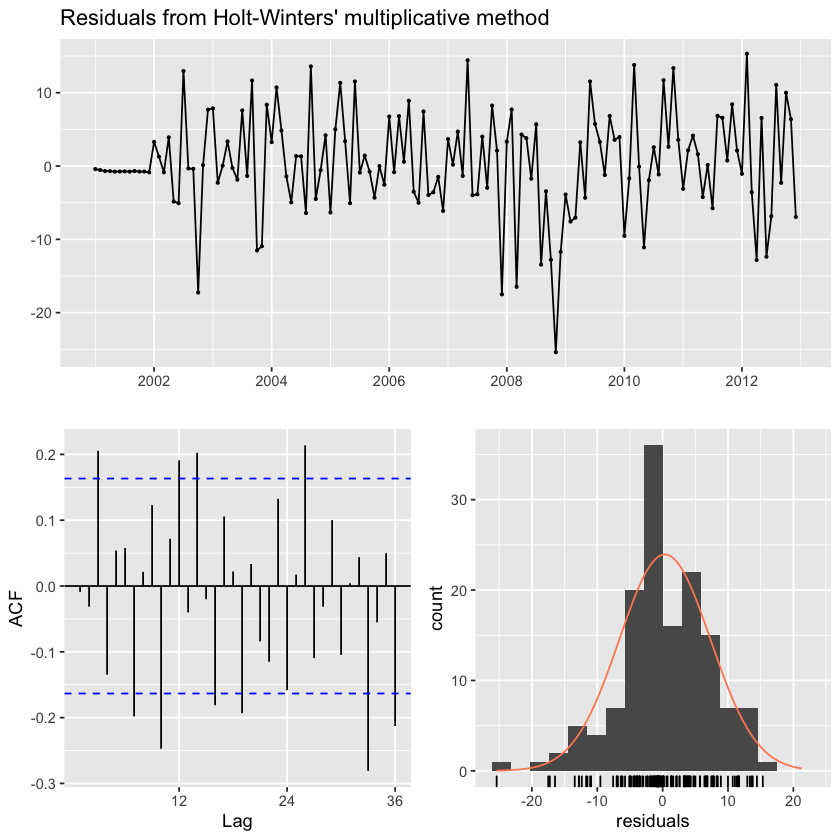

In [16]:
#Check residuals
checkresiduals(fchw)

In [17]:
#Error measures
accuracy(fchw, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.3470525,6.965648,5.217871,0.1068492,1.677555,0.3175361,-0.00891342
Test set,10.1053750,10.105375,10.105375,3.0194772,3.019477,0.6149675,NA


In [18]:
#Summary (with point forecast)
summary(fchw)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = salestrain, h = 1, seasonal = "multiplicative", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6291 
    beta  = 0 
    gamma = 0.4599 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 1.1704 1.0267 1.0392 0.9256 1.0442 0.9856
           1.0201 1.0528 0.976 0.9931 0.8777 0.8887

  sigma:  0.0224
Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.3470525 6.965648 5.217871 0.1068492 1.677555 0.3175361
                    ACF1
Training set -0.00891342

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2013       324.5676 315.2645 333.8708 310.3397 338.7956


In [19]:
#Additive
fchw_a <- hw(salestrain, seasonal = "additive", initial="simple", h = 1)

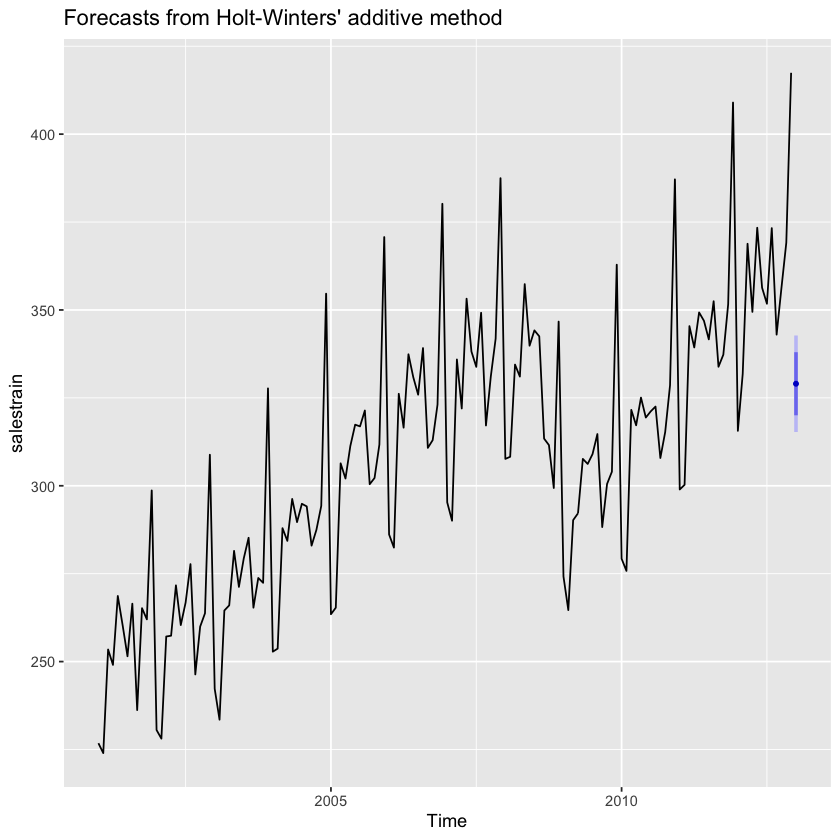

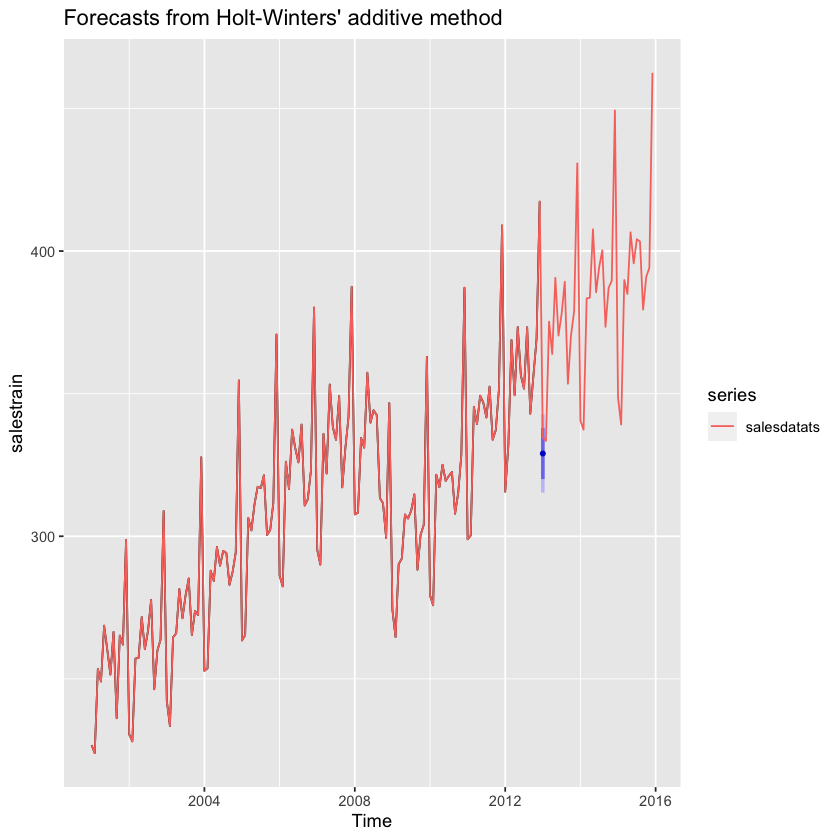

In [20]:
#Autoplots
autoplot(fchw_a)
autoplot(fchw_a) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 90.341, df = 7, p-value < 2.2e-16

Model df: 17.   Total lags used: 24



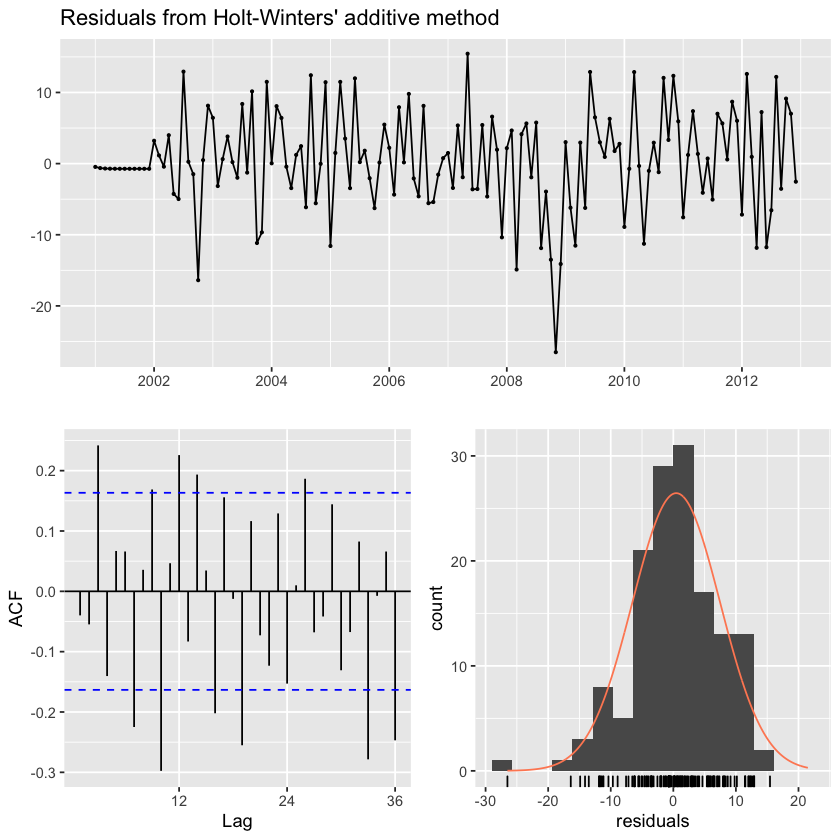

In [21]:
#Check residuals
checkresiduals(fchw_a)

In [22]:
#Error measures
accuracy(fchw_a, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.4662772,7.000808,5.290958,0.1168648,1.698746,0.3219838,-0.03987172
Test set,5.6592111,5.659211,5.659211,1.6909673,1.690967,0.3443941,NA


In [23]:
#Summary (with point forecast)
summary(fchw_a)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = salestrain, h = 1, seasonal = "additive", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6323 
    beta  = 0 
    gamma = 0.4087 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 43.477 6.815 9.999 -18.979 11.271 -3.685
           5.126 13.469 -6.127 -1.75 -31.218 -28.398

  sigma:  7.0008
Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4662772 7.000808 5.290958 0.1168648 1.698746 0.3219838
                    ACF1
Training set -0.03987172

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2013       329.0138 320.0419 337.9857 315.2925 342.7351


In [24]:
#Holt-Winters Method (estimation sample 2001-2010): 
salestrain_1 <- window(salesdatats, start = c(2001,1), end = c(2010,12))

In [25]:
#Multiplicative
fchw_1 <- hw(salestrain_1, seasonal = "multiplicative", initial="simple", h = 1)

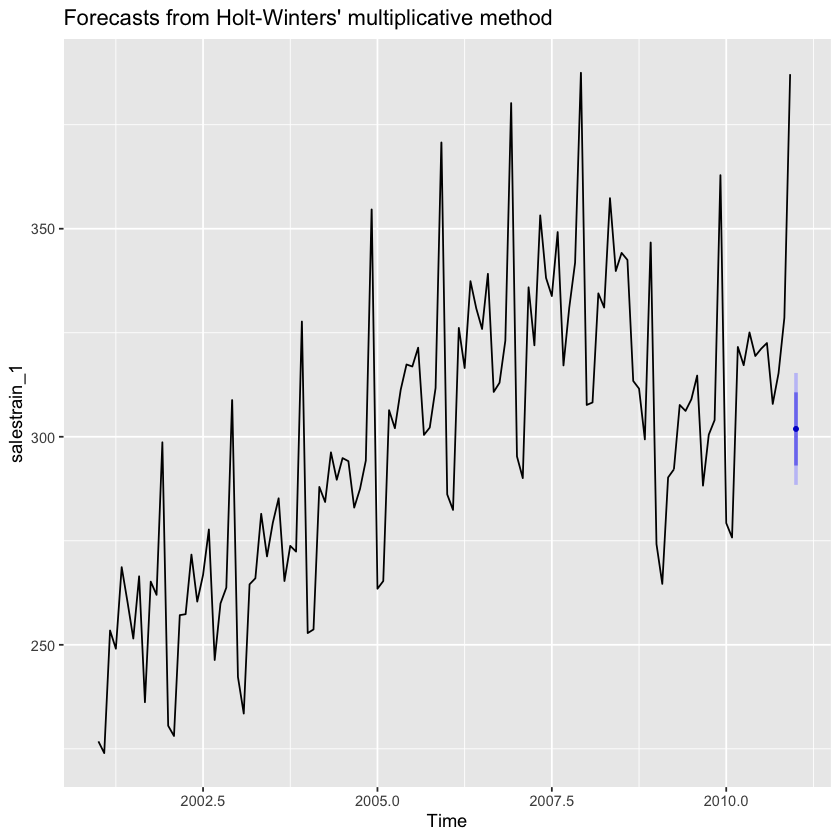

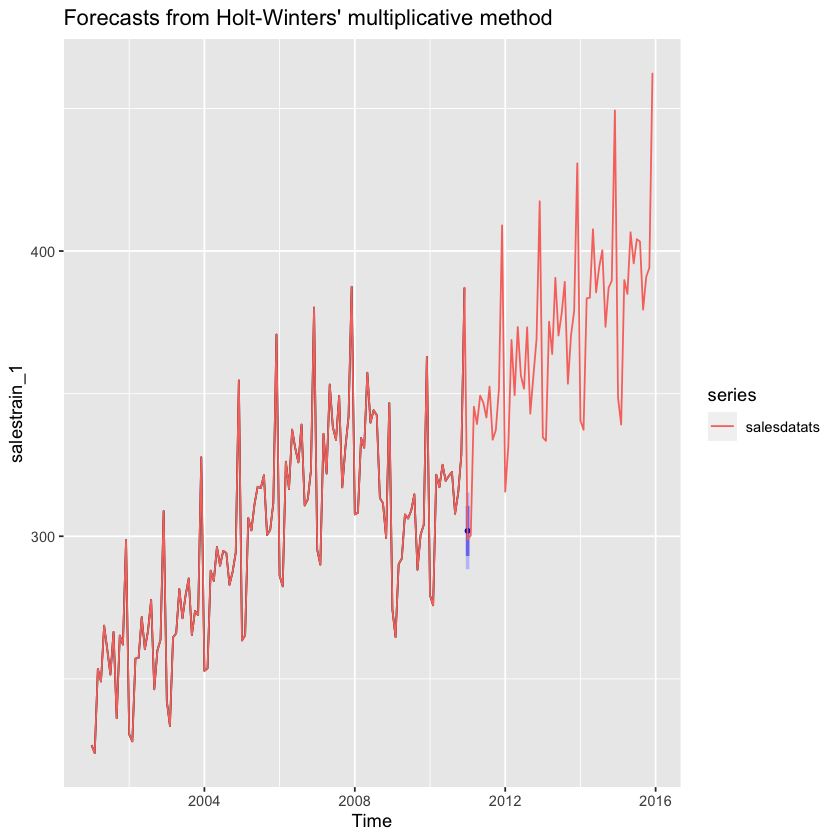


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 43.035, df = 7, p-value = 3.284e-07

Model df: 17.   Total lags used: 24



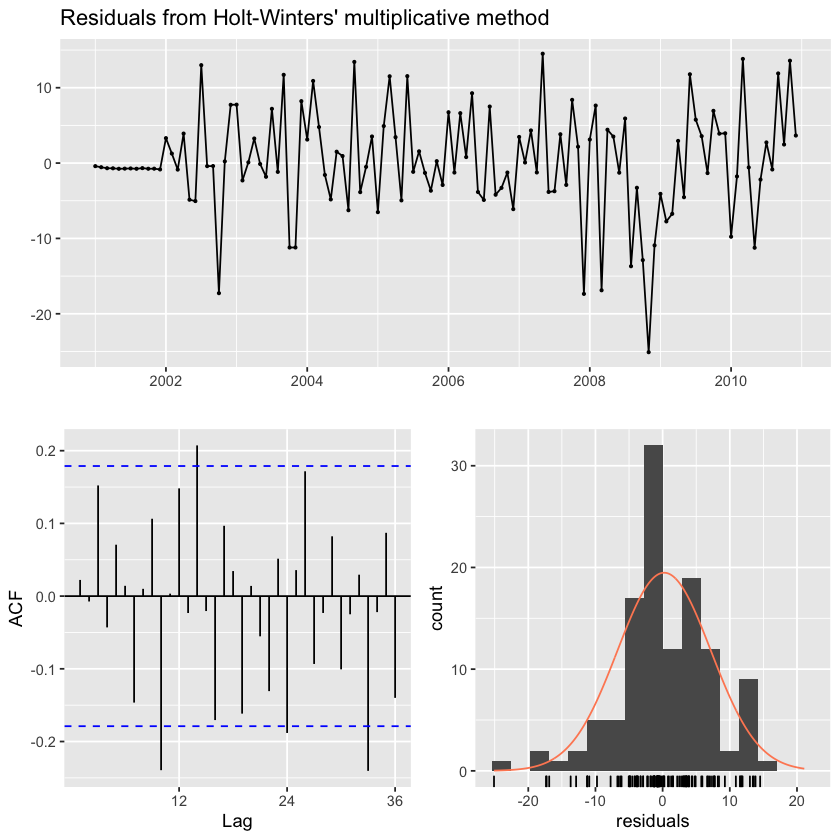

In [26]:
#Autoplots
autoplot(fchw_1)
autoplot(fchw_1) + autolayer(salesdatats)#Check residuals
checkresiduals(fchw_1)

In [27]:
#Error measures
accuracy(fchw_1, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2261702,6.928255,5.080784,0.0726631,1.678192,0.3259043,0.0222462
Test set,-2.9404541,2.940454,2.940454,-0.9836170,0.983617,0.1886139,NA


In [28]:
#Summary (with point forecast)
summary(fchw_1)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = salestrain_1, h = 1, seasonal = "multiplicative", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6356 
    beta  = 0 
    gamma = 0.4813 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 1.1704 1.0267 1.0392 0.9256 1.0442 0.9856
           1.0201 1.0528 0.976 0.9931 0.8777 0.8887

  sigma:  0.0227
Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.2261702 6.928255 5.080784 0.0726631 1.678192 0.3259043 0.0222462

Forecasts:
         Point Forecast    Lo 80    Hi 80   Lo 95    Hi 95
Jan 2011       301.8835 293.0913 310.6756 288.437 315.3299


In [29]:
#Additive
fchw_a_1 <- hw(salestrain_1, seasonal = "additive", initial="simple", h = 1)

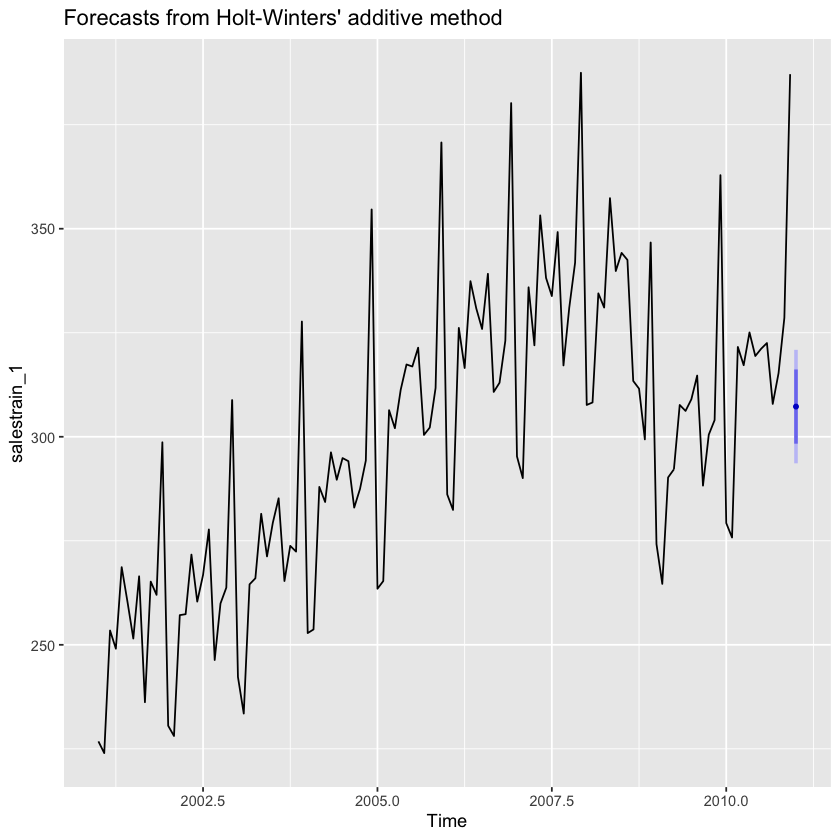

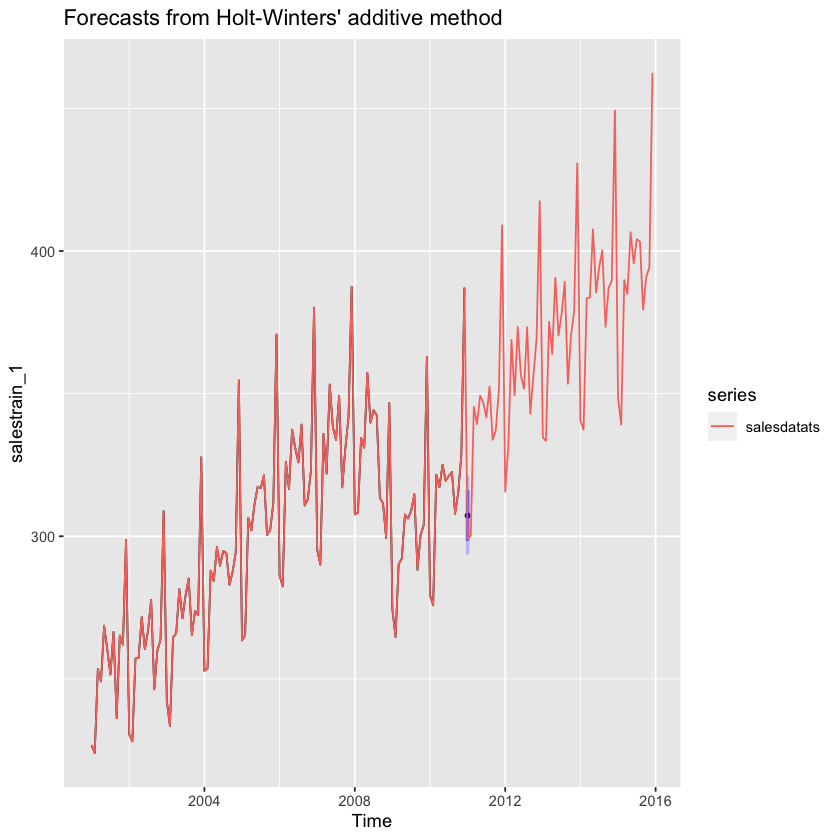

In [30]:
#Autoplots
autoplot(fchw_a_1)
autoplot(fchw_a_1) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 57.94, df = 7, p-value = 3.885e-10

Model df: 17.   Total lags used: 24



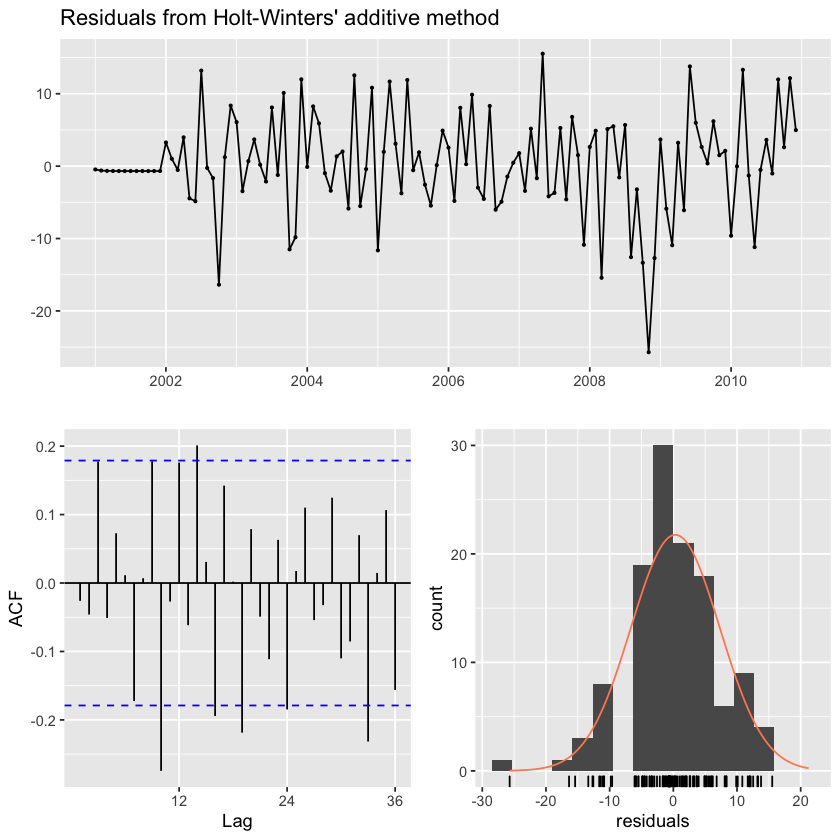

In [31]:
#Check residuals
checkresiduals(fchw_a_1)

In [32]:
#Error measures
accuracy(fchw_a_1, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.3136709,6.957442,5.120975,0.07813983,1.688921,0.3284823,-0.02603532
Test set,-8.3110319,8.311032,8.311032,-2.78013932,2.780139,0.5331068,NA


In [33]:
#Summary (with point forecast)
summary(fchw_a_1)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = salestrain_1, h = 1, seasonal = "additive", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6779 
    beta  = 0 
    gamma = 0.4235 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 43.477 6.815 9.999 -18.979 11.271 -3.685
           5.126 13.469 -6.127 -1.75 -31.218 -28.398

  sigma:  6.9574
Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.3136709 6.957442 5.120975 0.07813983 1.688921 0.3284823
                    ACF1
Training set -0.02603532

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2011        307.254 298.3377 316.1704 293.6177 320.8904


In [34]:
#Holt-Winters Method (estimation sample 2001-2011):
#Multiplicative
salestrain_2 <- window(salesdatats, start = c(2001,1), end = c(2011,12))
fchw_2 <- hw(salestrain_2, seasonal = "multiplicative", initial="simple", h = 1)

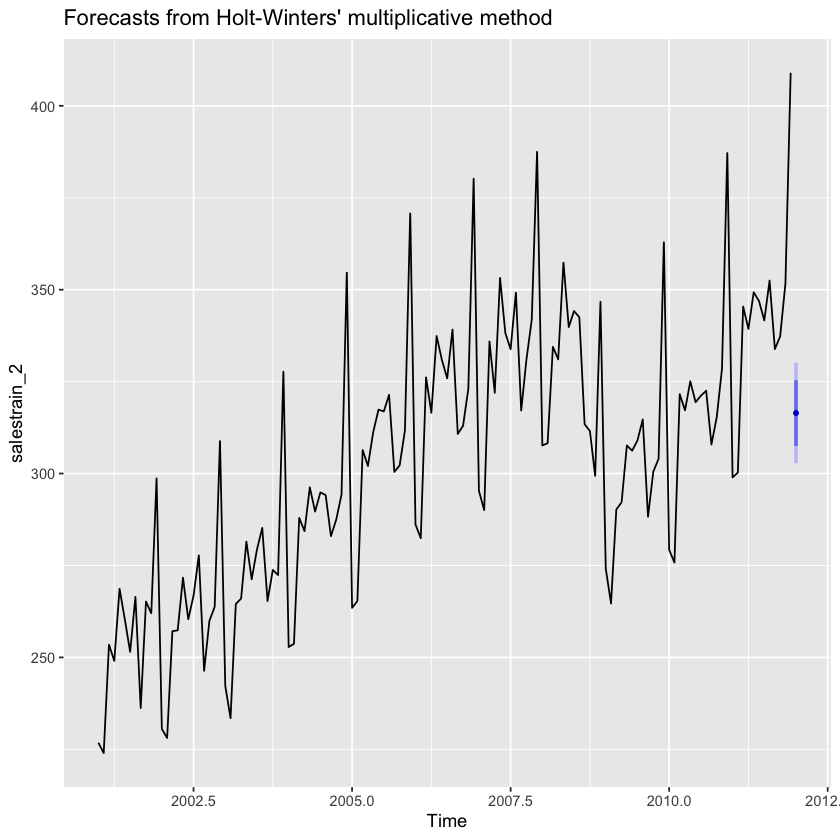

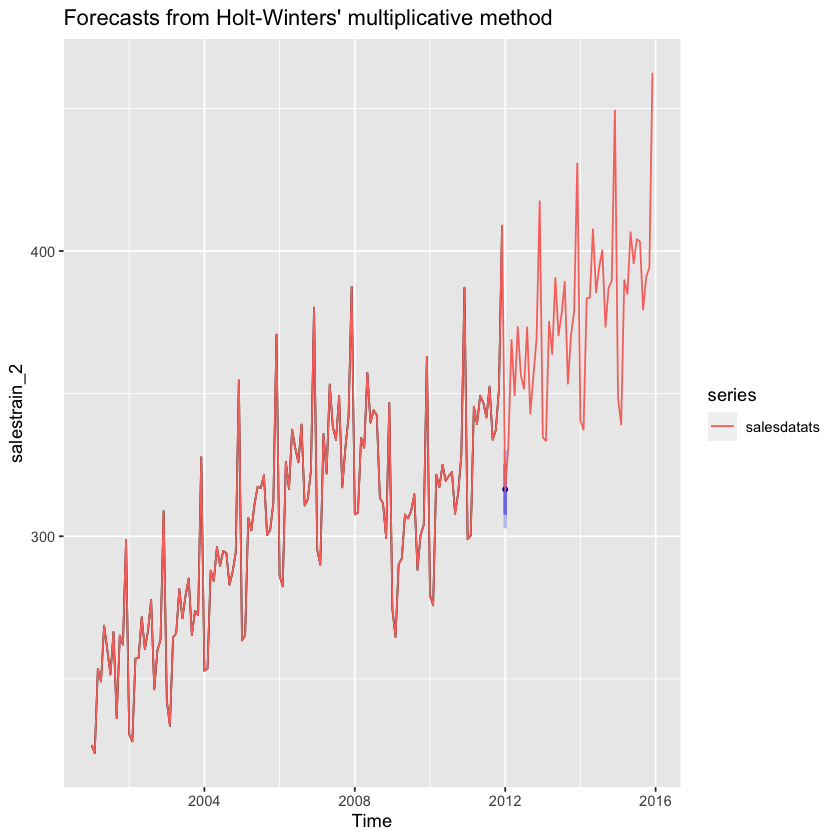

In [35]:
#Autoplots
autoplot(fchw_2)
autoplot(fchw_2) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 50.903, df = 7, p-value = 9.599e-09

Model df: 17.   Total lags used: 24



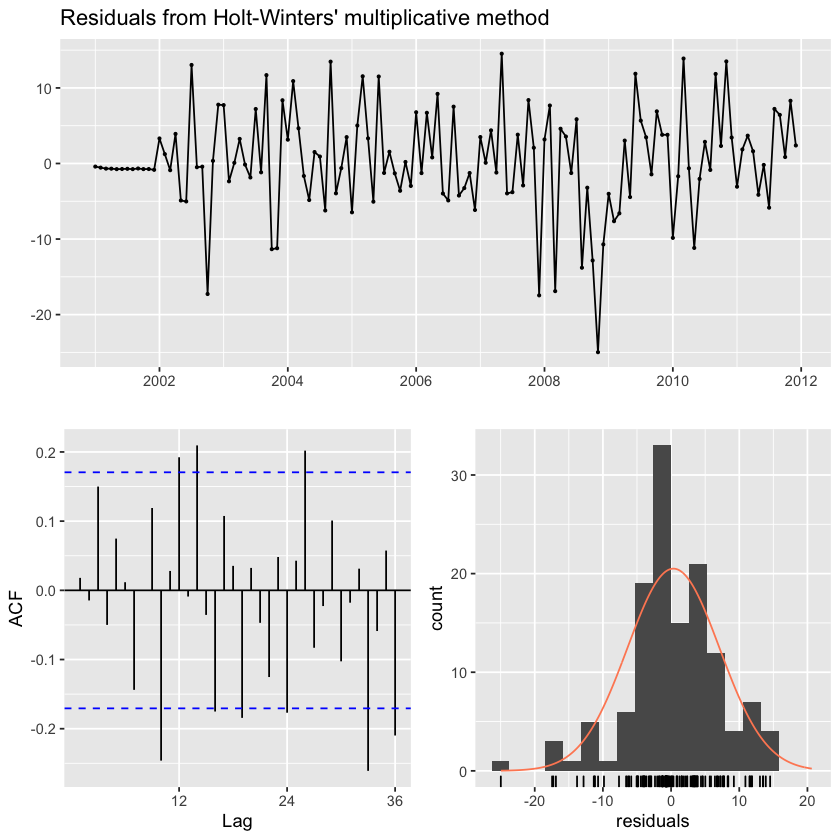

In [36]:
#Check residuals
checkresiduals(fchw_2)

In [37]:
#Error measures
accuracy(fchw_2, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.3470260,6.7474766,4.9666777,0.1058318,1.6274322,0.30271914,0.0180233
Test set,-0.8333164,0.8333164,0.8333164,-0.2640202,0.2640202,0.05079066,NA


In [38]:
#Summary (with point forecast)
summary(fchw_2)


Forecast method: Holt-Winters' multiplicative method

Model Information:
Holt-Winters' multiplicative method 

Call:
 hw(y = salestrain_2, h = 1, seasonal = "multiplicative", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6431 
    beta  = 0 
    gamma = 0.4801 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 1.1704 1.0267 1.0392 0.9256 1.0442 0.9856
           1.0201 1.0528 0.976 0.9931 0.8777 0.8887

  sigma:  0.022
Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 0.347026 6.747477 4.966678 0.1058318 1.627432 0.3027191 0.0180233

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2012       316.4593 307.5188 325.3999 302.7859 330.1327


In [39]:
#Additive
fchw_a_2 <- hw(salestrain_2, seasonal = "additive", initial="simple", h = 1)

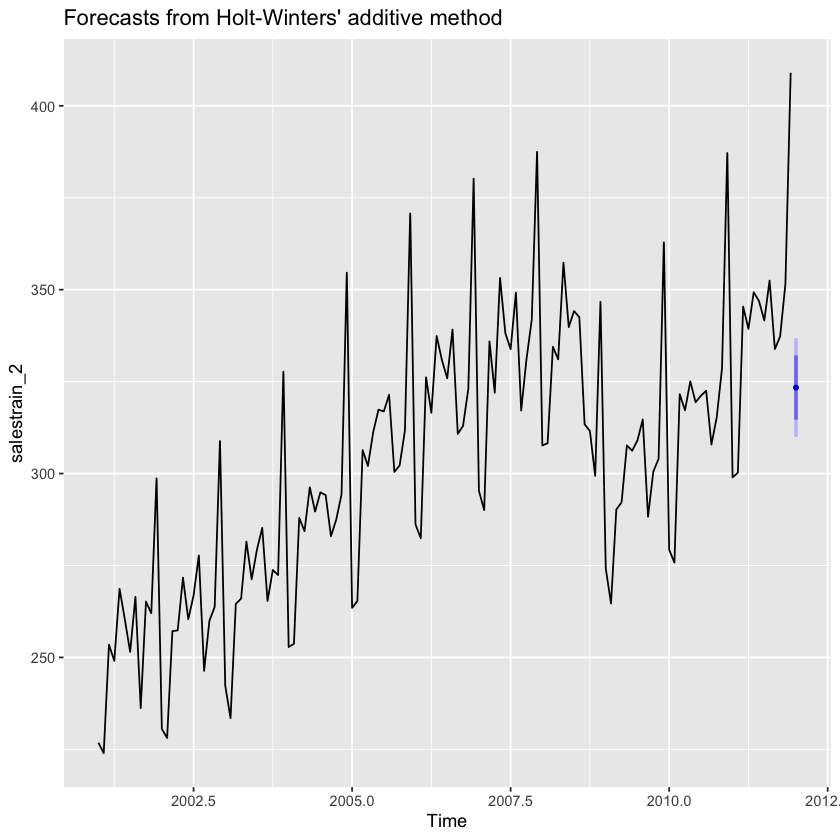

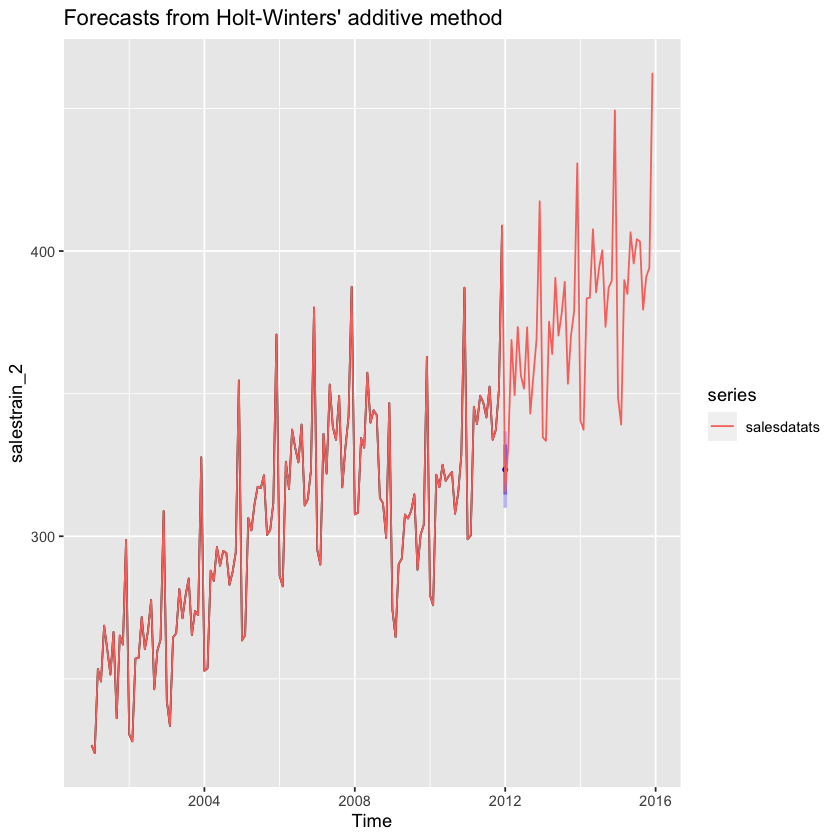

In [40]:
#Autoplots
autoplot(fchw_a_2)
autoplot(fchw_a_2) + autolayer(salesdatats)


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 72.569, df = 7, p-value = 4.464e-13

Model df: 17.   Total lags used: 24



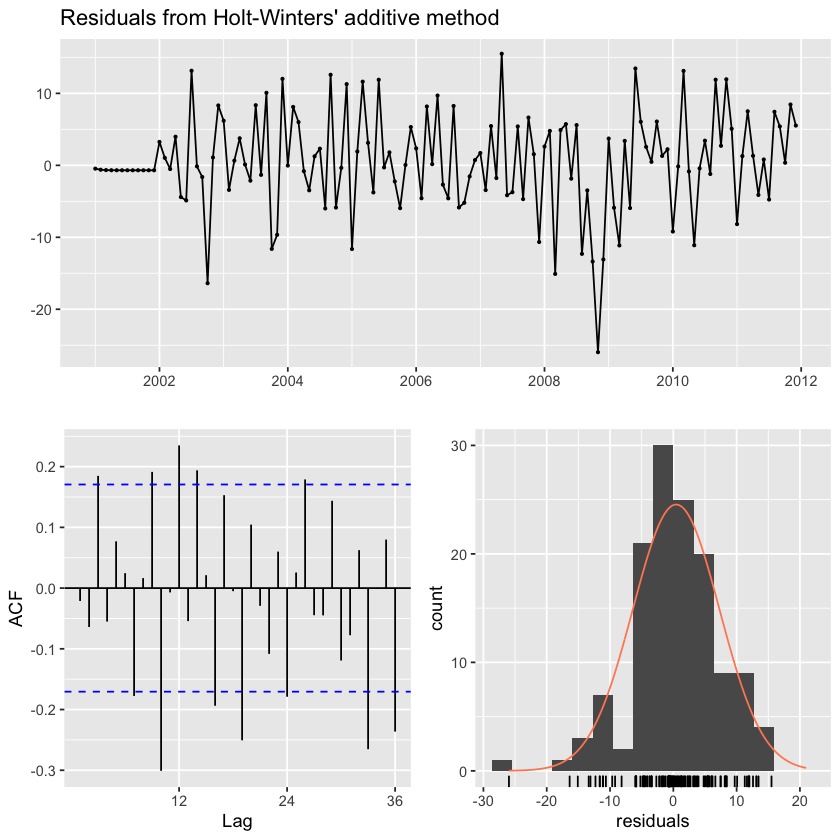

In [41]:
#Check residuals
checkresiduals(fchw_a_2)

In [42]:
#Error measures
accuracy(fchw_a_2, salesdatats)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.4454433,6.833463,5.072907,0.1125129,1.656876,0.3091938,-0.02121359
Test set,-7.7635284,7.763528,7.763528,-2.4597240,2.459724,0.4731873,NA


In [43]:
#Summary (with point forecast)
summary(fchw_a_2)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = salestrain_2, h = 1, seasonal = "additive", initial = "simple") 

  Smoothing parameters:
    alpha = 0.6687 
    beta  = 0 
    gamma = 0.409 

  Initial states:
    l = 255.189 
    b = 0.4603 
    s = 43.477 6.815 9.999 -18.979 11.271 -3.685
           5.126 13.469 -6.127 -1.75 -31.218 -28.398

  sigma:  6.8335
Error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.4454433 6.833463 5.072907 0.1125129 1.656876 0.3091938
                    ACF1
Training set -0.02121359

Forecasts:
         Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
Jan 2012       323.3895 314.6321 332.147 309.9962 336.7829
